In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-census/adult income1.csv


# **Importing the Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

# **Importing Dataset and EDA**

In [3]:
adult_df = pd.read_csv("/kaggle/input/adult-income-census/adult income1.csv")

In [4]:
adult_df.head()

age workclass  fnlwgt education  education.num marital.status  occupation  \
0   17   Private  148522      11th              7  Never-married  occupation   
1   17   Private   93235      12th              8  Never-married  occupation   
2   17   Private  184924       9th              5  Never-married  occupation   
3   17   Private  116626      11th              7  Never-married  occupation   
4   17   Private  209949      11th              7  Never-married  occupation   

  relationship   race     sex native.country income  
0    Own-child  White    Male  United-States  <=50K  
1    Own-child  White  Female  United-States  <=50K  
2    Own-child  White    Male  United-States  <=50K  
3    Own-child  White    Male  United-States  <=50K  
4    Own-child  White  Female  United-States  <=50K

In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


The .info() method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. 

In [6]:
adult_df.shape

(31947, 12)

In [7]:
adult_df.nunique() 

age                  73
workclass             9
fnlwgt            21381
education            16
education.num        16
marital.status        7
occupation           16
relationship          6
race                  5
sex                   2
native.country       42
income                2
dtype: int64

In [8]:
adult_df.describe #statistics summary of our  dataset

<bound method NDFrame.describe of        age    workclass  fnlwgt education  education.num      marital.status  \
0       17      Private  148522      11th              7       Never-married   
1       17      Private   93235      12th              8       Never-married   
2       17      Private  184924       9th              5       Never-married   
3       17      Private  116626      11th              7       Never-married   
4       17      Private  209949      11th              7       Never-married   
...    ...          ...     ...       ...            ...                 ...   
31942   90            ?  175444   7th-8th              4           Separated   
31943   90  Federal-gov  195433   HS-grad              9  Married-civ-spouse   
31944   90      Private   47929   HS-grad              9  Married-civ-spouse   
31945   90            ?  313986   HS-grad              9  Married-civ-spouse   
31946   90      Private  313749   HS-grad              9             Widowed   

     

# **Data Visualizations**

**Univariate Analysis**

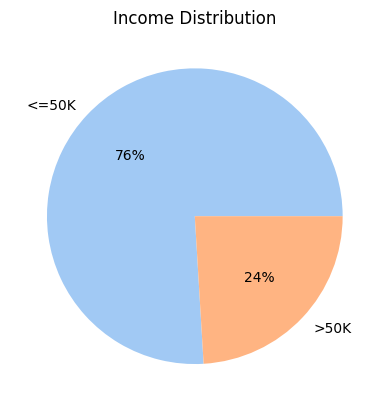

In [9]:
#visualization fro our target variable
income = dict(adult_df["income"].value_counts())
palette =  sns.color_palette("pastel")
plt.pie(income.values(), labels = income.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Income Distribution")
plt.show();

In [10]:
race_counts = adult_df['race'].value_counts().reset_index()
race_counts.columns = ['race', 'count']

fig = px.pie(race_counts, names='race', values='count',
             title="Distribution of Race")
fig.show()

In [11]:
#distribution of relationship
relationship_counts = adult_df['relationship'].value_counts().reset_index()
relationship_counts.columns = ['relationship', 'count']

fig = px.pie(relationship_counts, names='relationship', values='count', hole=0.3,
             title="Distribution of Relationship Statuses")
fig.update_traces(textinfo='percent+label', pull=0.05)

fig.show()

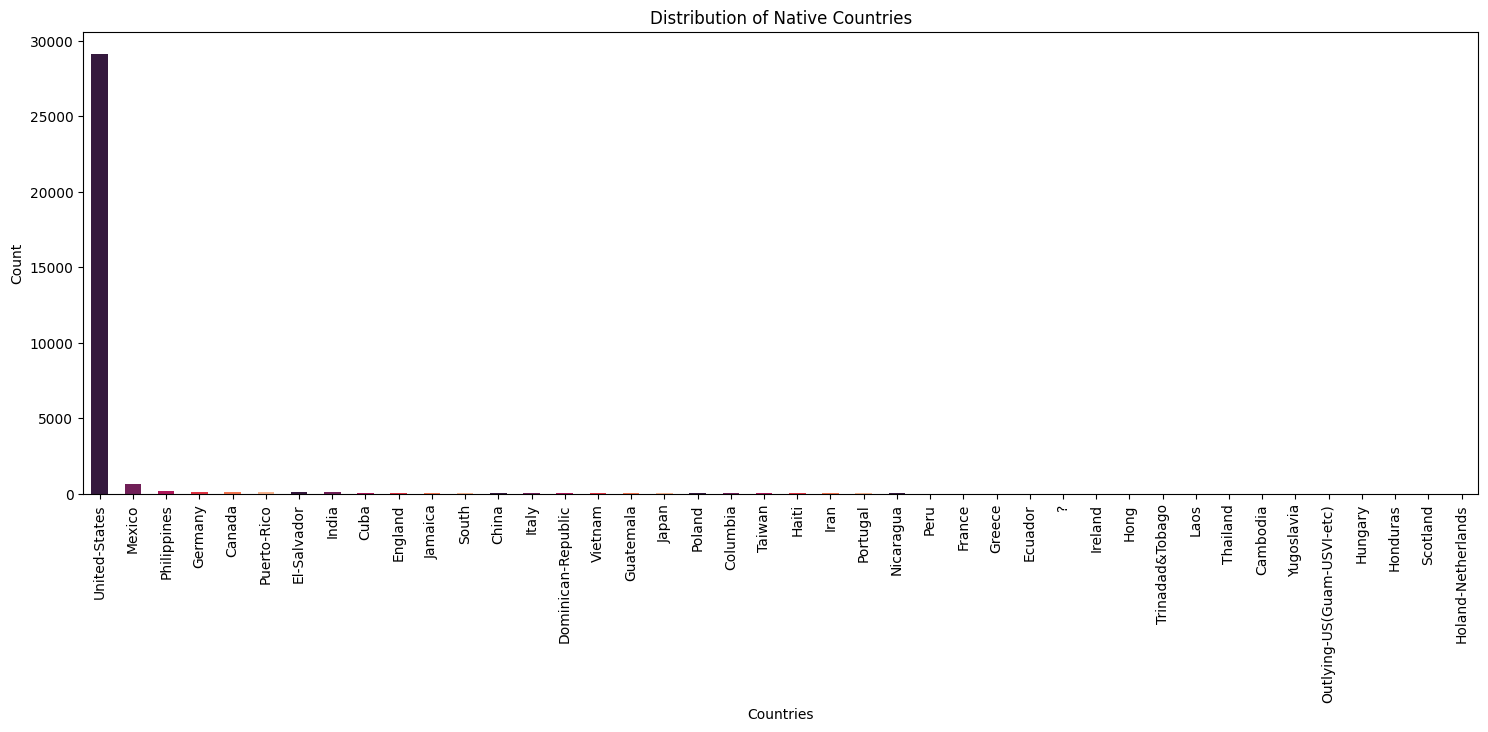

In [12]:
# Create a bar plot to visualize the count of native countries
plt.figure(figsize=(18,6))
ax = adult_df["native.country"].value_counts().plot(kind="bar", color = sns.color_palette("rocket"))
ax.set_xlabel("Countries")
ax.set_ylabel("Count")
ax.set_title("Distribution of Native Countries");

In [13]:
#count of marital status
mar = adult_df["marital.status"].value_counts()
# Create a donut chart
fig = go.Figure(data=[go.Pie(labels=mar.index,
                             values=mar.values,
                             hole=.3)]) 

fig.update_layout(title_text="Distribution of Marital Status")
fig.show()

**Bivariate Analysis**

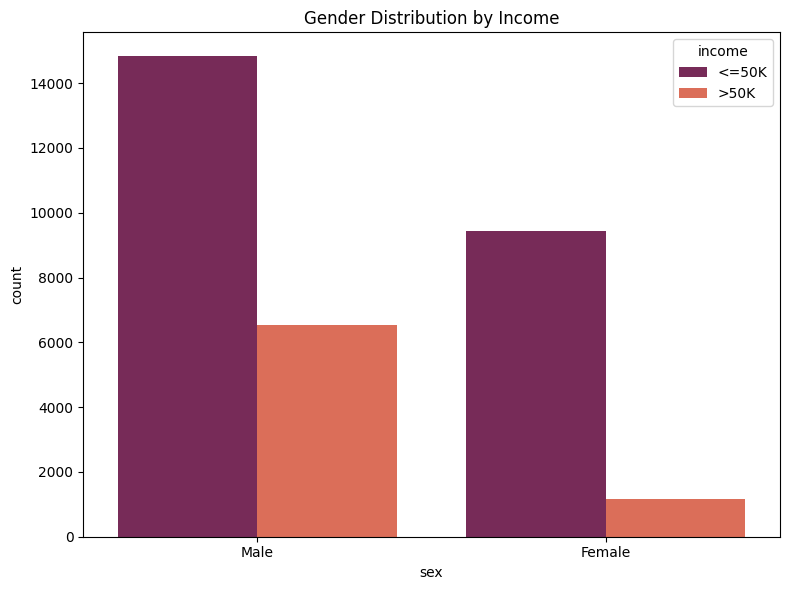

In [14]:
#gender distribution by income
plt.figure(figsize = (8,6))
sns.countplot(data = adult_df, x = "sex", hue = "income", palette = "rocket")
plt.title("Gender Distribution by Income")
plt.tight_layout();

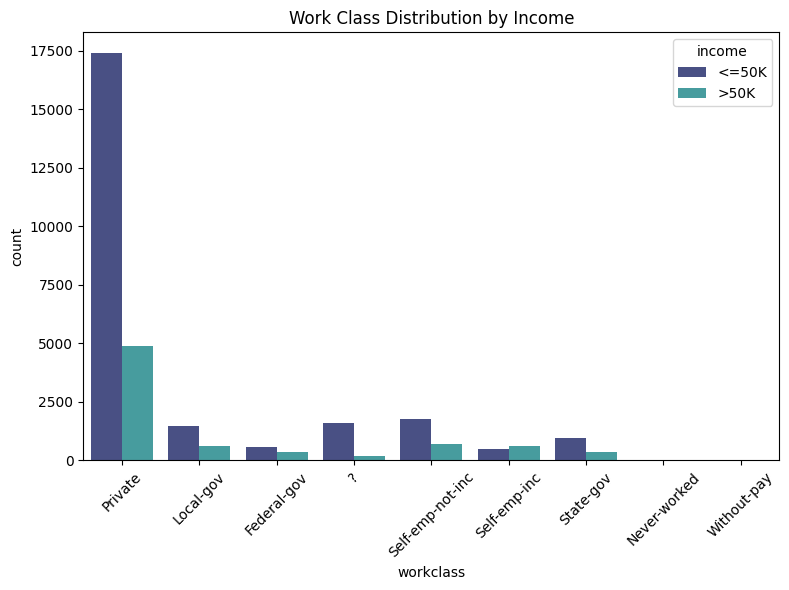

In [15]:
#workclass distribution by income
plt.figure(figsize = (8,6))
sns.countplot(data = adult_df, x = "workclass", hue = "income", palette = "mako")
plt.xticks(rotation = 45)
plt.title("Work Class Distribution by Income")
plt.tight_layout();

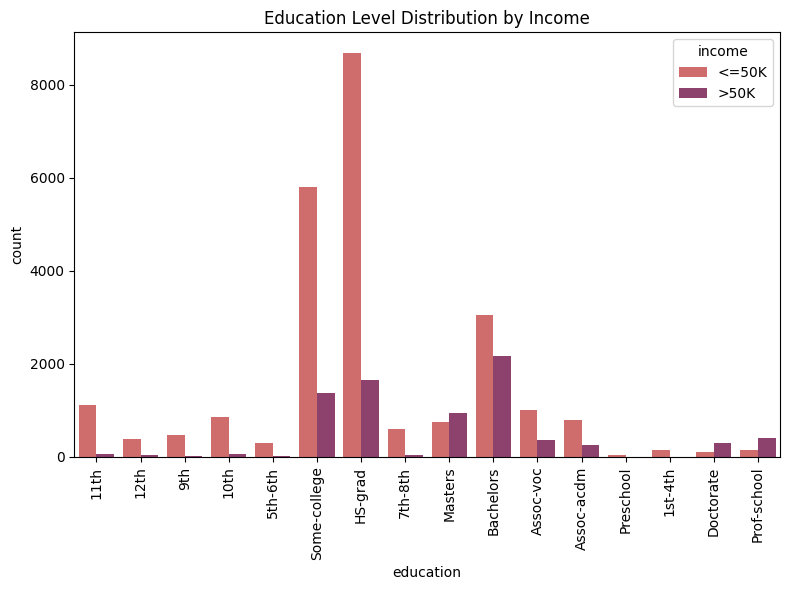

In [16]:
#education level distribution by income
plt.figure(figsize = (8,6))
sns.countplot(data = adult_df, x = "education", hue = "income", palette = "flare")
plt.xticks(rotation = 90)
plt.title("Education Level Distribution by Income")
plt.tight_layout();

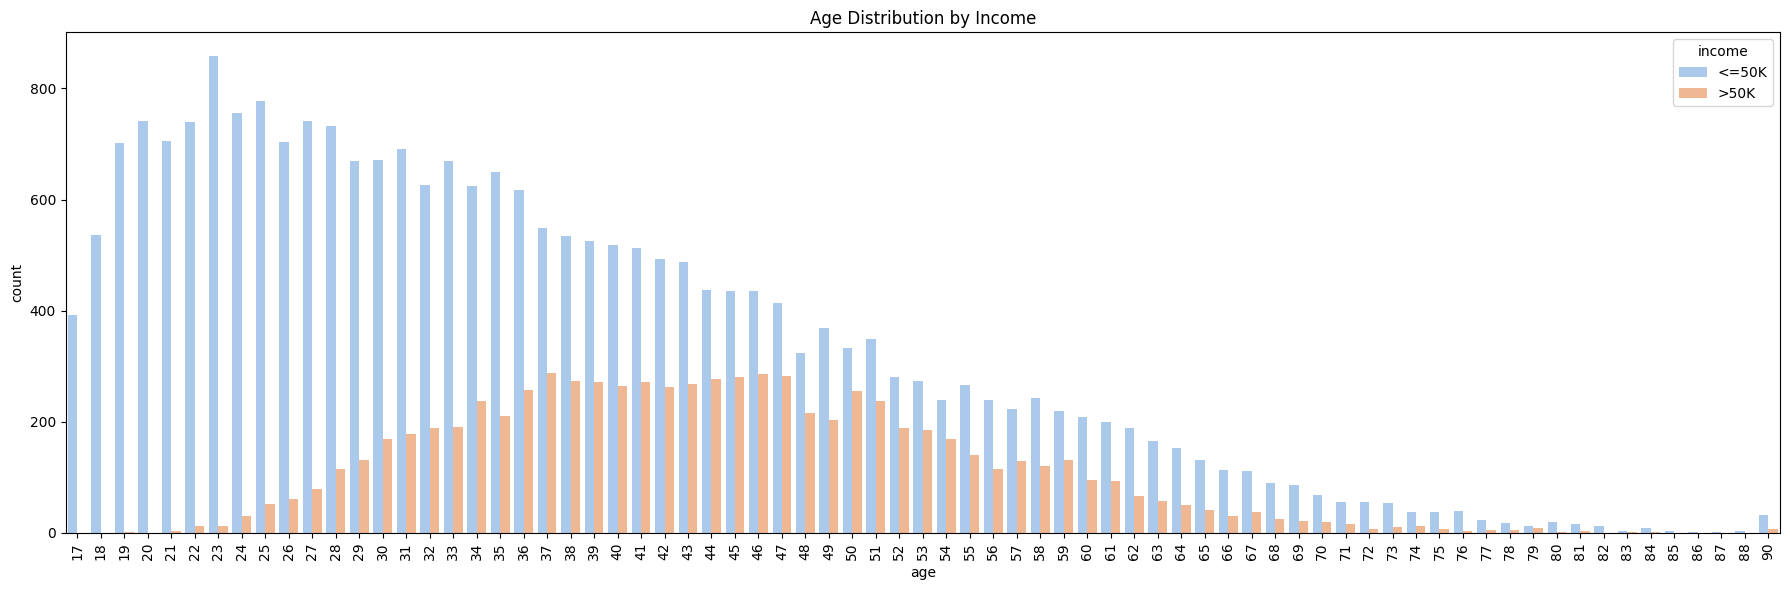

In [17]:
#age distribution by income
plt.figure(figsize = (18,6))
sns.countplot(data = adult_df, x = "age", hue = "income", palette = "pastel")
plt.xticks(rotation = 90)
plt.title("Age Distribution by Income")
plt.tight_layout();

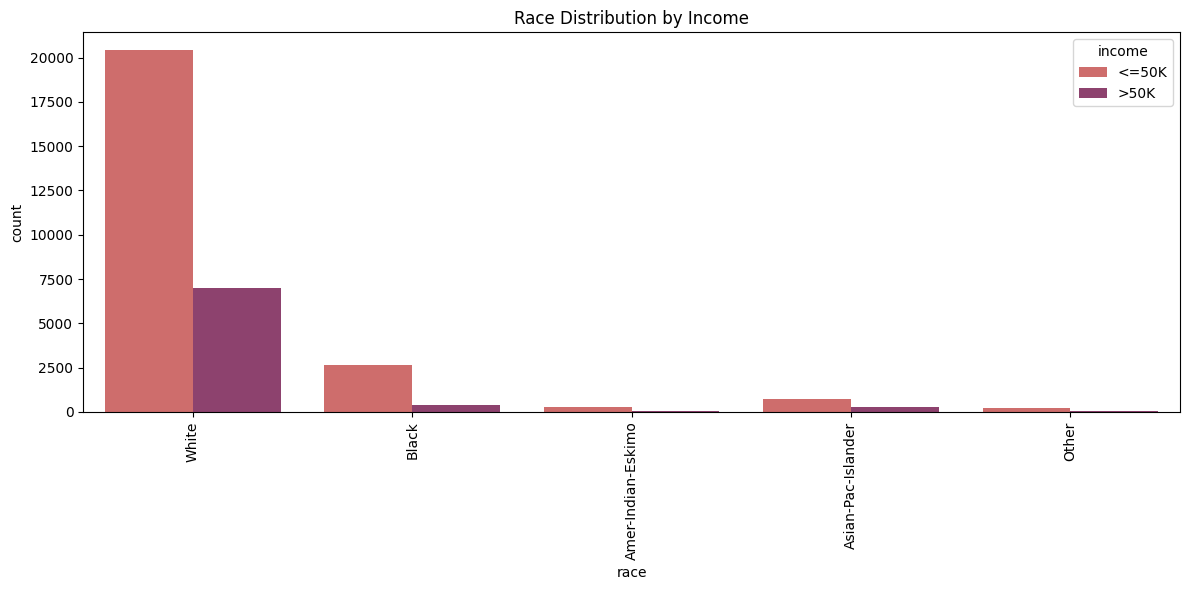

In [18]:
#race distribution by income
plt.figure(figsize = (12,6))
sns.countplot(data = adult_df, x = "race", hue = "income", palette = "flare")
plt.xticks(rotation = 90)
plt.title("Race Distribution by Income")
plt.tight_layout();

In [19]:
#creating a 3d scatter plot of the numerical columns by our target variable
fig = px.scatter_3d(adult_df, 
                    x='age', 
                    y='education.num', 
                    z='fnlwgt',
                    color='income', 
                    color_discrete_map={'<=50K': 'pink', '>50K': 'grey'},
                    title="3D Scatter Plot of Age, Education Number, and Final Weight by Income")
#plt.savefig("scatter")
fig.show();
plt.savefig("scatter2")

<Figure size 640x480 with 0 Axes>

In [20]:
#visualization of all categorical data by age
fig = px.parallel_categories(adult_df, dimensions=['education', 'marital.status', 'occupation','income'],
                             color=adult_df['age'], 
                             color_continuous_scale=px.colors.sequential.Inferno,
                             title="Parallel Categories Diagram of Education, Marital Status, Occupation and Income by Age")
fig.show()

In [21]:
#visualization of all categorical data by age
fig = px.parallel_categories(adult_df, dimensions=['workclass','relationship','race', 'sex','income'],
                             color=adult_df['age'], 
                             color_continuous_scale=px.colors.sequential.Inferno,
                             title="Parallel Categories Diagram of Workclass, Relationship, Race and Sex by Age")
fig.show()

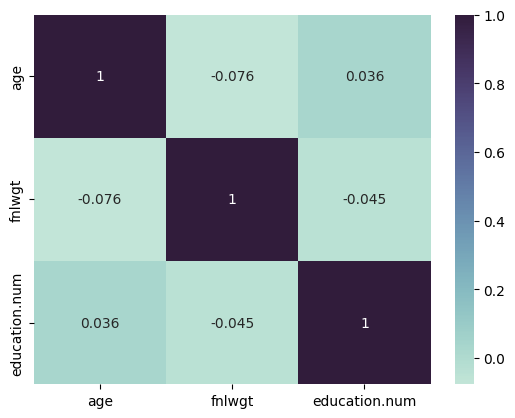

In [22]:
sns.heatmap(adult_df.corr(numeric_only = True), annot = True, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True));

# **Model Building**

In [23]:
#getting our features 
df_X = adult_df.drop(columns=['income'])

#encoding the categorical features in our dataset
X = pd.get_dummies(df_X, drop_first = True)

# Separating the target variable
y = adult_df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Convert to binary: 1 for '>50K' and 0 for '<=50K'

#splitting our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



**Random Forest Classifier**

In [24]:
#initializing our model
rfc = RandomForestClassifier()

#fit the training data
rfc.fit(X_train,y_train)

#make predictions
y_pred = rfc.predict(X_test)

#model evaluataion using cross val score
# Perform cross-validation using cross_val_score
cross_val_scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cross_val_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
mean_accuracy = cross_val_scores.mean()
std_deviation = cross_val_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")


Cross-Validation Scores: [0.76306729 0.62519562 0.48520895 0.52621694 0.33902019]
Mean Accuracy: 0.55
Standard Deviation: 0.14


In [25]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for RFC:", accuracy)

Accuracy for RFC: 0.8206572769953052


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4872
           1       0.64      0.56      0.60      1518

    accuracy                           0.82      6390
   macro avg       0.75      0.73      0.74      6390
weighted avg       0.81      0.82      0.82      6390



**XGB**

In [27]:
model_2 = xgb.XGBClassifier(objective ="binary:logistic", random_state =42 )
model_2.fit(X_train,y_train)
y_pred = model_2.predict(X_test)
accur = accuracy_score(y_test, y_pred)
print("XGB Accuracy:", accur)

XGB Accuracy: 0.8395931142410016


# **Visualization to show how each feature contributed to the performance of the model**

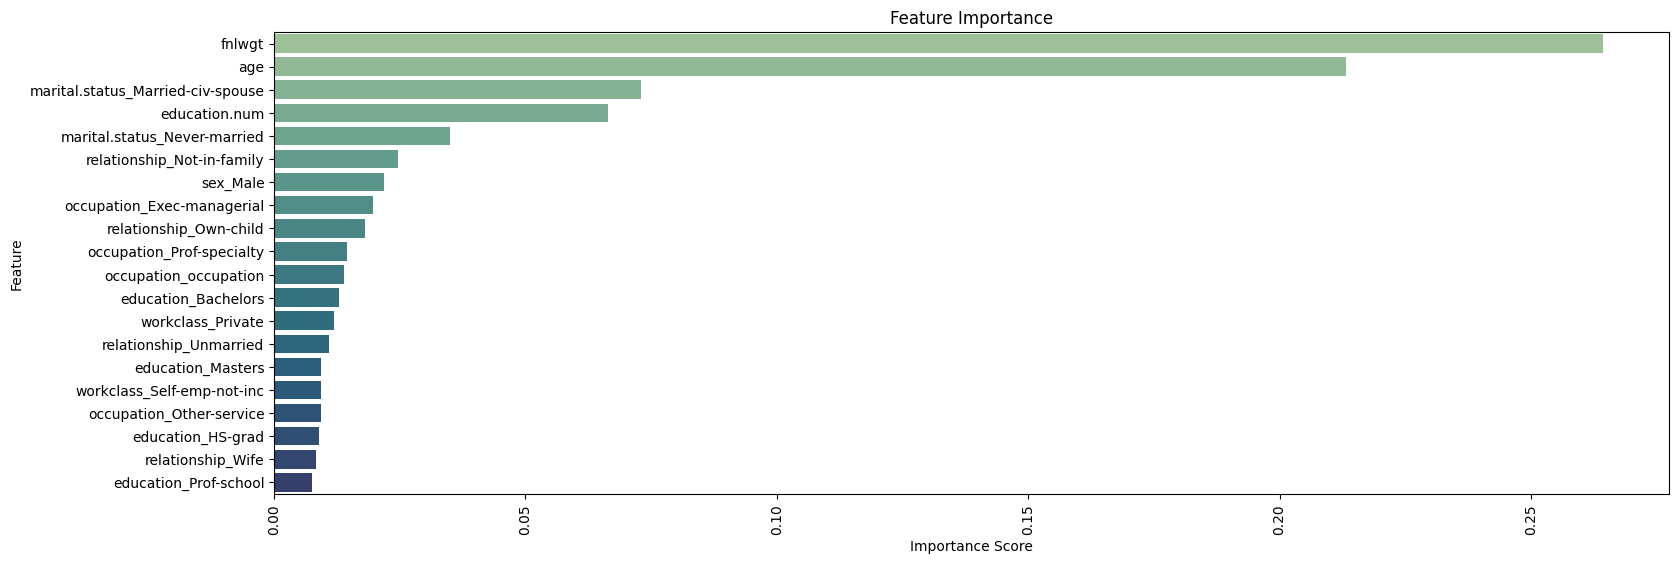

In [28]:
# Initializing the machine learning model
rcf = RandomForestClassifier()  

# Fit the model to the data
rcf.fit(X, y)  # X is the feature matrix, y is the target variable

# Get feature importances from the model
feature_importances = rcf.feature_importances_

# Create a DataFrame to associate feature names with their importance scores (assuming your features are named)
feature_names = list(X.columns)  # Replace with your feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = (feature_importance_df.sort_values(by='Importance', ascending=False))[:20]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(18, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette = "crest")
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation = 90)
plt.ylabel('Feature')
plt.show()

From the above visualization, the final weight is a great contributor to the model's performance. There are also studies that suggest that weight may have an effect on pay for men and women, depending on how thin or obese they are.
